# PHASE I: Clustering Basé sur des Représentants (K-Means)

## 1.1 Cas d'Usage 1: Connaissance Client et Segmentation (Ventes)

### CONTEXTE:

- Segmenter les clients selon leurs dépenses annuelles et leur score de dépenses
- Objectif: trouver des groupes homogènes pour des campagnes marketing ciblées

📊 Données clients (14 clients):
  Forme: (14, 2)
  Features: ['Annual_Income (k$)', 'Spending_Score (1-100)']

Premiers clients:
[[15 39]
 [17 35]
 [18 92]
 [20 95]
 [23 75]]

✓ Données standardisées (moyenne=0, std=1):
[[-1.29216281 -0.19418149]
 [-1.20841151 -0.33540439]
 [-1.16653587  1.67702195]
 [-1.08278457  1.78293912]
 [-0.95715763  1.07682462]]


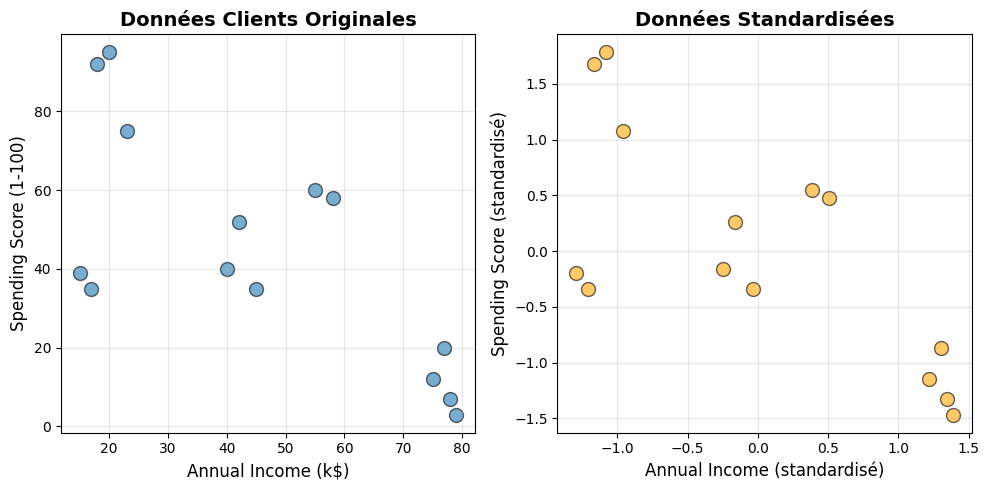

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Créer des données simulées de clients (2D pour visualisation)
# Colonnes: Annual_Income (k$), Spending_Score (1-100)
X_sim = np.array([
    [15, 39], [17, 35], [18, 92], [20, 95], [23, 75], 
    [78, 7], [75, 12], [77, 20], [79, 3], 
    [40, 40], [42, 52], [45, 35], [55, 60], [58, 58]
])

# 2. Afficher les données brutes
print("📊 Données clients (14 clients):")
print(f"  Forme: {X_sim.shape}")
print(f"  Features: ['Annual_Income (k$)', 'Spending_Score (1-100)']")
print("\nPremiers clients:")
print(X_sim[:5])

# 3. Standardisation des données (CRUCIAL pour K-Means!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sim)

print("\n✓ Données standardisées (moyenne=0, std=1):")
print(X_scaled[:5])

# 4. Visualisation des données brutes
plt.figure(figsize=(10, 5))

# Subplot 1: Données originales
plt.subplot(1, 2, 1)
plt.scatter(X_sim[:, 0], X_sim[:, 1], s=100, alpha=0.6, edgecolors='k')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Données Clients Originales', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Subplot 2: Données standardisées
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=100, alpha=0.6, 
            edgecolors='k', color='orange')
plt.xlabel('Annual Income (standardisé)', fontsize=12)
plt.ylabel('Spending Score (standardisé)', fontsize=12)
plt.title('Données Standardisées', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('client_data_preparation.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.2 Optimisation et Évaluation de K-Means
### Tache 1.2 - Choisir K (Méthode du Coude/Elbow)

🔄 Test de K-Means pour différentes valeurs de K...
  K=1: Inertie=28.00
  K=2: Inertie=10.25, Silhouette=0.5616
  K=3: Inertie=4.42, Silhouette=0.6018
  K=4: Inertie=1.60, Silhouette=0.6888
  K=5: Inertie=0.76, Silhouette=0.7213
  K=6: Inertie=0.46, Silhouette=0.6859
  K=7: Inertie=0.29, Silhouette=0.6413
  K=8: Inertie=0.12, Silhouette=0.5335
  K=9: Inertie=0.08, Silhouette=0.4781
  K=10: Inertie=0.04, Silhouette=0.4103


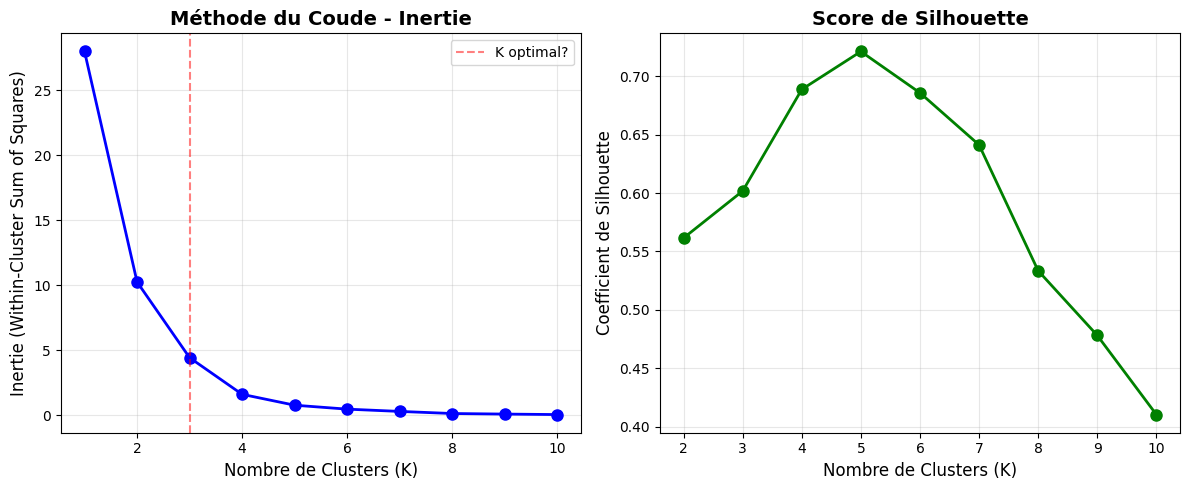

In [2]:
from sklearn.metrics import silhouette_score

# 1. Tester K-Means pour K de 1 à 10
inertia_list = []
silhouette_scores = []
K_range = range(1, 11)

print("🔄 Test de K-Means pour différentes valeurs de K...")

for k in K_range:
    # Entraîner K-Means avec k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # Stocker l'inertie
    inertia_list.append(kmeans.inertia_)
    
    # Calculer Silhouette (seulement si k >= 2)
    if k >= 2:
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"  K={k}: Inertie={kmeans.inertia_:.2f}, Silhouette={silhouette_avg:.4f}")
    else:
        silhouette_scores.append(None)
        print(f"  K={k}: Inertie={kmeans.inertia_:.2f}")

# 2. Visualisation de la Méthode du Coude (Elbow Method)
plt.figure(figsize=(12, 5))

# Subplot 1: Inertie
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_list, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Nombre de Clusters (K)', fontsize=12)
plt.ylabel('Inertie (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Méthode du Coude - Inertie', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Annoter le "coude" (généralement K=3 ou K=4)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.5, label='K optimal?')
plt.legend()

# Subplot 2: Silhouette Score
plt.subplot(1, 2, 2)
K_range_silhouette = range(2, 11)
silhouette_valid = [s for s in silhouette_scores if s is not None]
plt.plot(K_range_silhouette, silhouette_valid, 'go-', linewidth=2, markersize=8)
plt.xlabel('Nombre de Clusters (K)', fontsize=12)
plt.ylabel('Coefficient de Silhouette', fontsize=12)
plt.title('Score de Silhouette', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

### Tache 1.3 - Évaluation par Silhouette


MODÈLE K-MEANS FINAL
  Nombre de clusters: 3
  Inertie: 4.42
  Coefficient de Silhouette: 0.6018
  Centroïdes:
[[-1.06882602  1.5122619 ]
 [ 1.31459619 -1.20039466]
 [-0.29312953  0.03782756]]

  Distribution des clients:
    Cluster 0: 3 clients
    Cluster 1: 4 clients
    Cluster 2: 7 clients


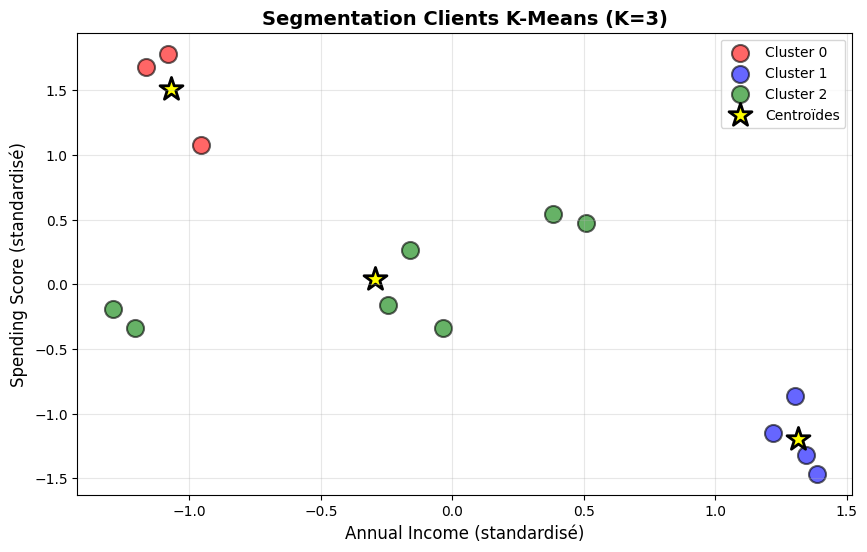

In [6]:
# 1. Choisir K optimal (basé sur l'analyse précédente)
K_optimal = 3

# 2. Entraîner le modèle final
kmeans_final = KMeans(n_clusters=K_optimal, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_scaled)

# 3. Calculer le coefficient de Silhouette
silhouette_avg = silhouette_score(X_scaled, labels_final)

print(f"\n{'='*60}")
print(f"MODÈLE K-MEANS FINAL")
print(f"{'='*60}")
print(f"  Nombre de clusters: {K_optimal}")
print(f"  Inertie: {kmeans_final.inertia_:.2f}")
print(f"  Coefficient de Silhouette: {silhouette_avg:.4f}")
print(f"  Centroïdes:\n{kmeans_final.cluster_centers_}")

# 4. Distribution des clients par cluster
unique, counts = np.unique(labels_final, return_counts=True)
print(f"\n  Distribution des clients:")
for cluster_id, count in zip(unique, counts):
    print(f"    Cluster {cluster_id}: {count} clients")

# 5. Visualisation des clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(K_optimal):
    cluster_points = X_scaled[labels_final == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                s=150, alpha=0.6, c=colors[i], 
                edgecolors='k', linewidth=1.5,
                label=f'Cluster {i}')

# Tracer les centroïdes
centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            s=300, c='yellow', marker='*',
            edgecolors='black', linewidth=2,
            label='Centroïdes')

plt.xlabel('Annual Income (standardisé)', fontsize=12)
plt.ylabel('Spending Score (standardisé)', fontsize=12)
plt.title(f'Segmentation Clients K-Means (K={K_optimal})', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.savefig('kmeans_final_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

## Coefficient de Silhouette - Explication

### Définition
Le coefficient de Silhouette mesure **la qualité d’un clustering** en évaluant à la fois
la **cohésion intra-cluster** et la **séparation inter-clusters** pour chaque point.

---

### Formule
Pour un point *i* :
\[
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
\]

Où :
- **a(i)** = distance moyenne entre *i* et les points de son cluster (cohésion)
- **b(i)** = distance moyenne minimale entre *i* et les points du cluster voisin le plus proche (séparation)

---

### Interprétation
- **s(i) proche de +1** : point bien assigné, cluster compact et bien séparé
- **s(i) proche de 0** : point à la frontière entre deux clusters
- **s(i) proche de -1** : point mal assigné, probablement dans le mauvais cluster

---

### Score moyen
La **Silhouette moyenne** est la moyenne des \( s(i) \) sur tous les points.
- **Intervalle** : \([-1, +1]\)
- **Valeur élevée** : clusters compacts et bien séparés

---

### Avantages / Limites
- **Avantages** :
  - Indépendant du modèle
  - Interprétable
  - Utile pour choisir le nombre de clusters

- **Limites** :
  - Sensible à la métrique de distance
  - Peu fiable pour des clusters de formes non convexes
  - Coût de calcul élevé pour de grands jeux de données


### PHASE II: Clustering Avancé et Comparaison Critique

### 2.1 Cas d'Usage 2: Segmentation Comportement Utilisateur (Gaming)

CONTEXTE:

- Données réelles de jeux vidéo souvent bruitées et non-globulaires
- K-Means assume des clusters sphériques → mauvais sur données complexes
- On va comparer 3 algorithmes sur données "moons" (non-globulaires)

### Tache 2.1 - Clustering Probabiliste (GMM/EM)

📊 Données 'Moons' générées:
  Forme: (200, 2)
  Type: Deux croissants de lune entrelacés

📈 COMPARAISON K-MEANS vs GMM:
  K-Means Silhouette: 0.4925
  GMM Silhouette:     0.4926


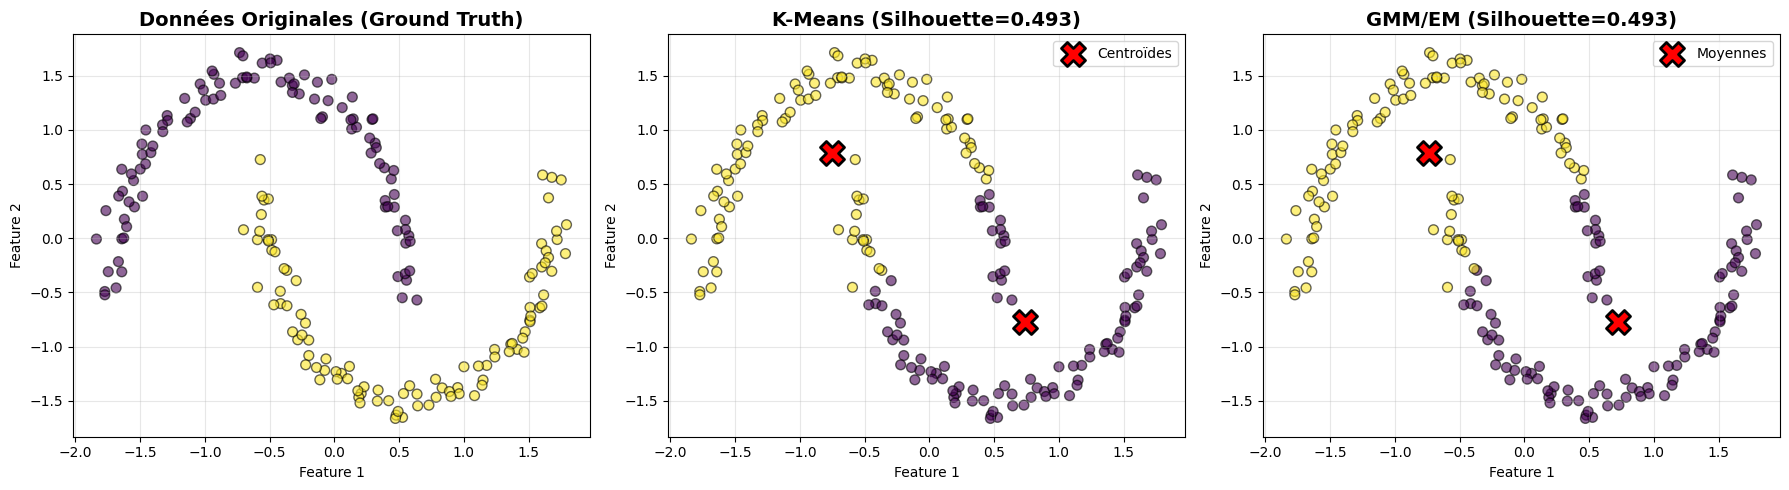

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons

# 1. Générer des données "moons" (deux croissants de lune)
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)
X_moons_scaled = StandardScaler().fit_transform(X_moons)

print("📊 Données 'Moons' générées:")
print(f"  Forme: {X_moons_scaled.shape}")
print(f"  Type: Deux croissants de lune entrelacés")

# 2. K-Means sur Moons
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans_moons.fit_predict(X_moons_scaled)

# 3. GMM (Gaussian Mixture Model) sur Moons
gmm = GaussianMixture(n_components=2, random_state=42, 
                       covariance_type='full')
labels_gmm = gmm.fit_predict(X_moons_scaled)

# 4. Métriques de comparaison
silhouette_kmeans = silhouette_score(X_moons_scaled, labels_kmeans)
silhouette_gmm = silhouette_score(X_moons_scaled, labels_gmm)

print(f"\n📈 COMPARAISON K-MEANS vs GMM:")
print(f"  K-Means Silhouette: {silhouette_kmeans:.4f}")
print(f"  GMM Silhouette:     {silhouette_gmm:.4f}")

# 5. Visualisation comparative
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1: Données originales
axes[0].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1],
                c=y_moons, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
axes[0].set_title('Données Originales (Ground Truth)', 
                   fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(alpha=0.3)

# Subplot 2: K-Means
axes[1].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1],
                c=labels_kmeans, cmap='viridis', s=50, 
                alpha=0.6, edgecolors='k')
axes[1].scatter(kmeans_moons.cluster_centers_[:, 0],
                kmeans_moons.cluster_centers_[:, 1],
                s=300, c='red', marker='X', edgecolors='black', linewidth=2,
                label='Centroïdes')
axes[1].set_title(f'K-Means (Silhouette={silhouette_kmeans:.3f})',
                   fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Subplot 3: GMM
axes[2].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1],
                c=labels_gmm, cmap='viridis', s=50, 
                alpha=0.6, edgecolors='k')
axes[2].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
                s=300, c='red', marker='X', edgecolors='black', linewidth=2,
                label='Moyennes')
axes[2].set_title(f'GMM/EM (Silhouette={silhouette_gmm:.3f})',
                   fontsize=14, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('kmeans_vs_gmm_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Algorithme EM pour GMM

### 1. Objectif du GMM
Un **GMM (Gaussian Mixture Model)** modélise les données comme un mélange de **K lois gaussiennes** :

\[
P(x) = \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k)
\]

Paramètres à estimer :
- **πₖ** : poids du cluster *k* (probabilité a priori)
- **μₖ** : moyenne du cluster *k*
- **Σₖ** : matrice de covariance du cluster *k*

Objectif : **maximiser la vraisemblance des données**, problème non résoluble directement → EM.

---

### 2. Algorithme EM – Deux Étapes

#### ÉTAPE E (Expectation)
On calcule la **probabilité d’appartenance** de chaque point à chaque cluster.

- Responsabilités :
\[
\gamma_{ik} = P(z_i = k \mid x_i)
\]

- Interprétation :
  - Chaque point appartient **partiellement** à plusieurs clusters
  - Les γᵢₖ mesurent le degré de responsabilité du cluster *k* pour le point *i*

---

#### ÉTAPE M (Maximization)
On **ré-estime les paramètres** du modèle en utilisant les responsabilités.

- Mise à jour de :
  - **πₖ** : proportion effective de points du cluster
  - **μₖ** : moyenne pondérée par les γᵢₖ
  - **Σₖ** : covariance pondérée par les γᵢₖ

- Interprétation :
  - Les clusters se déplacent, s’étirent et se redimensionnent
  - Les paramètres maximisent la vraisemblance conditionnelle donnée l’étape E

---

### 3. Convergence
L’algorithme EM converge lorsque :
- La **log-vraisemblance** n’augmente plus significativement
- Ou qu’un nombre maximal d’itérations est atteint

Propriété clé : la vraisemblance **augmente à chaque itération** (convergence vers un optimum local).

---

### 4. Différences K-Means vs GMM

| Aspect | K-Means | GMM |
|------|--------|-----|
| Affectation | Hard (0 ou 1) | Soft (probabilités) |
| Forme clusters | Sphérique | Ellipsoïdale |
| Flexibilité | Faible | Élevée |

---

### 5. Avantages GMM
- Modélisation probabiliste complète
- Clusters de formes et tailles variées
- Affectation souple (incertitude mesurable)
- Meilleure représentation de données complexes
- Généralisation de K-Means (cas particulier)



### 2.2 Clustering Basé sur la Densité (DBSCAN)



RÉSULTATS DBSCAN
  Hyperparamètres:
    eps (ε): 0.3
    min_samples: 5

  Résultats:
    Nombre de clusters: 2
    Points de bruit (label -1): 1
    Points dans clusters: 199
    Silhouette (sans bruit): 0.3848


/tmp/ipykernel_979343/4000354963.py:57: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], s=size, c=[col],


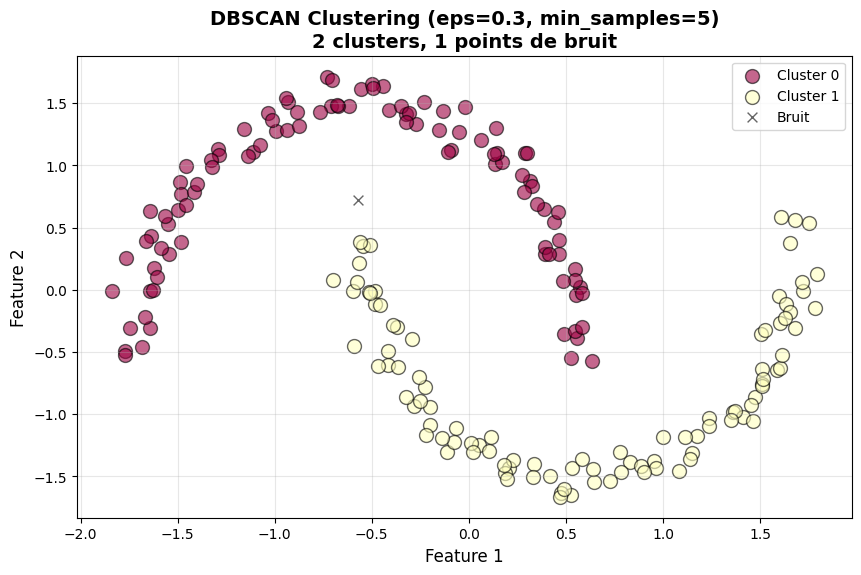

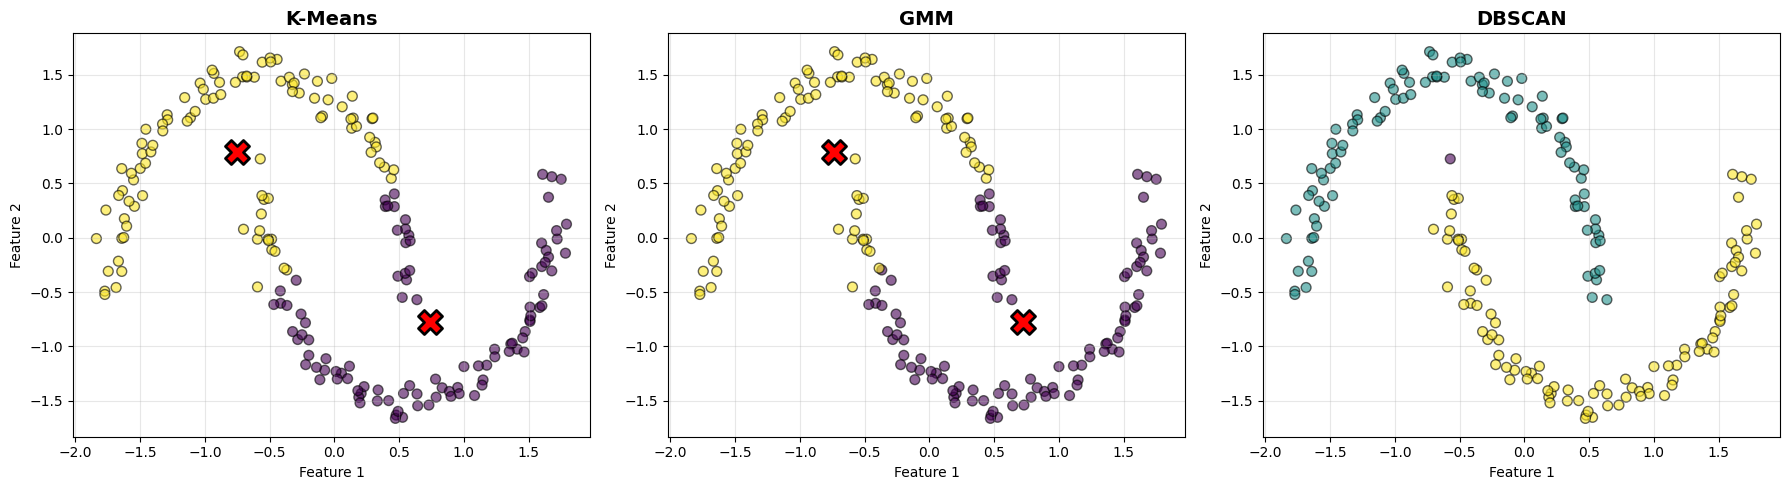

In [8]:
from sklearn.cluster import DBSCAN

# 1. Appliquer DBSCAN
# Hyperparamètres à ajuster:
# - eps (ε): rayon du voisinage
# - min_samples: nombre minimum de points pour former un cluster dense

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_moons_scaled)

# 2. Analyser les résultats
num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
num_noise = np.sum(labels_dbscan == -1)

print(f"\n{'='*60}")
print(f"RÉSULTATS DBSCAN")
print(f"{'='*60}")
print(f"  Hyperparamètres:")
print(f"    eps (ε): 0.3")
print(f"    min_samples: 5")
print(f"\n  Résultats:")
print(f"    Nombre de clusters: {num_clusters}")
print(f"    Points de bruit (label -1): {num_noise}")
print(f"    Points dans clusters: {len(labels_dbscan) - num_noise}")

# 3. Calculer Silhouette (sans les points de bruit)
if num_clusters > 1:
    mask_no_noise = labels_dbscan != -1
    if np.sum(mask_no_noise) > 0:
        silhouette_dbscan = silhouette_score(
            X_moons_scaled[mask_no_noise], 
            labels_dbscan[mask_no_noise]
        )
        print(f"    Silhouette (sans bruit): {silhouette_dbscan:.4f}")

# 4. Visualisation DBSCAN
plt.figure(figsize=(10, 6))

# Tracer les clusters
unique_labels = set(labels_dbscan)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors_dbscan):
    if k == -1:
        # Points de bruit en noir
        col = [0, 0, 0, 1]
        marker = 'x'
        size = 50
        label = 'Bruit'
    else:
        marker = 'o'
        size = 100
        label = f'Cluster {k}'
    
    class_member_mask = (labels_dbscan == k)
    xy = X_moons_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=size, c=[col], 
                marker=marker, alpha=0.6, edgecolors='k', 
                linewidth=1, label=label)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title(f'DBSCAN Clustering (eps=0.3, min_samples=5)\n'
          f'{num_clusters} clusters, {num_noise} points de bruit',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('dbscan_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Comparaison des 3 algorithmes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

algorithms = [
    ('K-Means', labels_kmeans, kmeans_moons.cluster_centers_),
    ('GMM', labels_gmm, gmm.means_),
    ('DBSCAN', labels_dbscan, None)
]

for idx, (name, labels, centers) in enumerate(algorithms):
    axes[idx].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1],
                      c=labels, cmap='viridis', s=50, 
                      alpha=0.6, edgecolors='k')
    
    if centers is not None:
        axes[idx].scatter(centers[:, 0], centers[:, 1],
                          s=300, c='red', marker='X', 
                          edgecolors='black', linewidth=2)
    
    axes[idx].set_title(name, fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('three_algorithms_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## DBSCAN - Density-Based Spatial Clustering

### 1. Principe de Fonctionnement
DBSCAN regroupe les points **selon la densité locale** plutôt que selon une distance à un centre.
Un cluster est une **zone dense** de points séparée des autres par des zones de faible densité.
L’algorithme explore l’espace en étendant les clusters à partir de régions suffisamment denses.

**Types de points :**
- **Core points (points noyaux)** : points ayant au moins *minPts* voisins dans un rayon ε
- **Border points (points frontières)** : points avec moins de *minPts* voisins mais atteignables depuis un core point
- **Noise points (points de bruit)** : points isolés, non atteignables depuis aucun core point

---

### 2. Hyperparamètres

**ε (epsilon) – Rayon du voisinage :**  
Distance maximale pour considérer deux points comme voisins.
- Valeur petite : clusters fragmentés, beaucoup de bruit
- Valeur grande : clusters fusionnés, perte de structure

**minPts (min_samples) – Seuil de densité :**  
Nombre minimal de points dans le voisinage ε pour définir un core point.
- Valeur petite : sensible au bruit, faux clusters
- Valeur grande : clusters plus robustes mais risque d’en perdre

**Comment choisir ε ?**  
- Utiliser le **k-distance graph** (k = minPts)
- Chercher le “coude” de la courbe des distances

---

### 3. Algorithme

Pour chaque point *p* :
1. Trouver les voisins dans le rayon ε
2. Si *p* a ≥ minPts voisins → core point → création/extension d’un cluster
3. Ajouter récursivement les points atteignables par densité
4. Sinon, marquer *p* comme bruit ou point frontière
5. Répéter jusqu’à explorer tous les points

---

### 4. Avantages sur Données "Moons"

**Pourquoi DBSCAN est meilleur que K-Means sur les moons ?**
- **Forme des clusters** : DBSCAN détecte des clusters non convexes et arbitraires
- **Gestion du bruit** : les points isolés sont identifiés comme bruit
- **Pas besoin de K** : aucun nombre de clusters à fixer à l’avance

K-Means impose des clusters sphériques → échec sur les formes en croissant.
DBSCAN suit la densité réelle → structure respectée.

---

### 5. Limites de DBSCAN
- Sensible au choix de ε et minPts
- Difficulté avec des densités très variables
- Performances dégradées en haute dimension


## k-NN vs Clustering: Objectifs Différents

### 1. k-NN (Apprentissage Supervisé)

**Objectif:**
Prédire le label d’une nouvelle observation à partir des labels de ses voisins les plus proches.

**Contexte:**
- Labels connus: Oui
- But: Prédiction (classification ou régression)
- Exemple: Prédire si un email est spam à partir d’emails déjà étiquetés

**Fonctionnement:**
Pour un point donné, k-NN :
- calcule la distance avec tous les points du dataset
- sélectionne les *k* plus proches
- agrège leurs labels (vote majoritaire ou moyenne)

---

### 2. Clustering (Apprentissage Non Supervisé)

**Objectif:**
Découvrir une structure latente dans les données en regroupant les points similaires.

**Contexte:**
- Labels connus: Non
- But: Regroupement
- Exemple: Regrouper des clients selon leur comportement d’achat

**Fonctionnement:**
L’algorithme regroupe les données selon une mesure de similarité
sans information préalable sur les classes.

---

### 3. Tableau Comparatif

| Aspect | k-NN | Clustering |
|--------|------|------------|
| Type | Supervisé | Non supervisé |
| Labels | Oui | Non |
| Objectif | Prédiction | Regroupement |
| Output | Label prédit | Cluster |
| Utilisation | Classification / régression | Exploration des données |

---

## Métriques de Similarité

### 1. Distance Euclidienne (Baseline)
Formule:  
d(x,y) = √(Σ(xᵢ - yᵢ)²)  
Usage: Données numériques continues

---

### 2. Cosine Similarity (Similarité Cosinus)

**Formule:**
\[
\cos(\theta) = \frac{x \cdot y}{\|x\| \|y\|}
\]

**Usage:**
Comparer des vecteurs haute dimension où la norme importe peu.

**Exemple concret:**
Comparaison de documents vectorisés (TF-IDF) en NLP.

**Avantage:**
Insensible à la longueur des textes, contrairement à l’Euclidienne.

---

### 3. Jaccard Index (Indice de Jaccard)

**Formule:**
\[
J(A,B) = \frac{|A \cap B|}{|A \cup B|}
\]

**Usage:**
Données binaires ou ensembles.

**Exemple concret:**
Similarité entre deux documents vus comme ensembles de mots-clés.

---

### 4. [BONUS] Manhattan Distance

**Formule:**
\[
d(x,y) = \sum |x_i - y_i|
\]

**Usage:**
Préférable quand les dimensions sont indépendantes ou en présence d’outliers.

---

### 5. [BONUS] Hamming Distance

**Définition:**
Nombre de positions où deux vecteurs diffèrent.

**Usage:**
Données binaires ou catégorielles (ex: codes, vecteurs booléens).

---

## Optimisation Recherche Voisins: KD-Trees et LSH

### Problématique
Pour k-NN ou DBSCAN à grande échelle :
- Recherche naïve: O(n) par requête
- Trop lent pour de grands volumes de données

---

### 1. KD-Tree (K-Dimensional Tree)

**Structure:**
Arbre binaire qui partitionne récursivement l’espace selon les dimensions.

**Construction:**
Division récursive des points par médiane sur une dimension.

**Recherche:**
Exploration partielle de l’arbre pour éviter de tout parcourir.

**Complexité:**
- Construction: O(n log n)
- Recherche: O(log n) (en basse dimension)

**Limites:**
- Inefficace en haute dimension
- Sensible à la malédiction de la dimensionnalité

---

### 2. LSH (Locality-Sensitive Hashing)

**Principe:**
Fonctions de hachage qui maximisent la probabilité
que des points similaires tombent dans le même bucket.

**Fonctionnement:**
- Projeter les données via des hash aléatoires
- Comparer uniquement les points du même bucket

**Avantages:**
- Très scalable
- Adapté aux espaces de grande dimension

**Application Concrète:**
Recommandation de documents :
- Vectorisation (TF-IDF / embeddings)
- Hash LSH
- Recherche des documents proches
- Classement final

---

### Comparaison KD-Tree vs LSH

| Aspect | KD-Tree | LSH |
|------|--------|-----|
| Meilleur pour | Basse dimension | Haute dimension |
| Complexité | Exacte mais limitée | Approximative mais rapide |
| Dimensionnalité | Faible | Élevée |


 ### PHASE III: MLOps et Gestion des Modèles de Clustering

### 3.1 Tracking des Modèles de Segmentation avec MLflow
CONTEXTE:

- La traçabilité est essentielle (comme vu en TP2)
- Le choix du nombre de clusters K est un hyperparamètre CRUCIAL
- MLflow permet de comparer facilement différentes configurations

### Tache 3.1 - Structuration des Expériences

In [9]:
import mlflow
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import joblib

# 1. Configurer l'expérience MLflow
mlflow.set_experiment("TP3_Customer_Clustering")

def track_clustering_run(X_data, k, run_name):
    """
    Track une expérience de clustering dans MLflow.
    
    Args:
        X_data: Données standardisées
        k: Nombre de clusters
        run_name: Nom du run MLflow
    """
    # Entraîner K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_data)
    
    # Calculer les métriques
    score_silhouette = silhouette_score(X_data, labels)
    score_calinski = calinski_harabasz_score(X_data, labels)
    inertia_value = kmeans.inertia_
    
    # Démarrer un run MLflow
    with mlflow.start_run(run_name=run_name):
        # 1. LOG HYPERPARAMÈTRES
        mlflow.log_param("K", k)
        mlflow.log_param("Algorithm", "KMeans")
        mlflow.log_param("n_init", 10)
        mlflow.log_param("random_state", 42)
        
        # 2. LOG MÉTRIQUES
        mlflow.log_metric("Inertia", inertia_value)
        mlflow.log_metric("Silhouette_Score", score_silhouette)
        mlflow.log_metric("Calinski_Harabasz_Score", score_calinski)
        
        # 3. LOG ARTIFACTS (Modèle + Centroïdes)
        # Sauvegarder le modèle
        joblib.dump(kmeans, "kmeans_model.pkl")
        mlflow.log_artifact("kmeans_model.pkl")
        
        # Sauvegarder les centroïdes en CSV
        import pandas as pd
        centroids_df = pd.DataFrame(
            kmeans.cluster_centers_,
            columns=['Annual_Income', 'Spending_Score']
        )
        centroids_df.to_csv('centroids.csv', index=False)
        mlflow.log_artifact('centroids.csv')
        
        # 4. LOG MODÈLE (format MLflow)
        mlflow.sklearn.log_model(kmeans, name="kmeans_model")
        
        print(f"✓ Run '{run_name}' enregistré:")
        print(f"    K={k}, Inertie={inertia_value:.2f}, Silhouette={score_silhouette:.4f}")
    
    return kmeans, labels

# 2. Tracer plusieurs configurations
print("\n" + "="*70)
print("TRACKING MLFLOW - COMPARAISON DE DIFFÉRENTES VALEURS DE K")
print("="*70)

# Tester K = 2, 3, 4, 5
K_values = [2, 3, 4, 5]
results = {}

for k in K_values:
    print(f"\n🔄 Test avec K={k}...")
    model, labels = track_clustering_run(
        X_scaled, 
        k, 
        f"KMeans_K{k}_CustomerSegmentation"
    )
    results[k] = {
        'model': model,
        'labels': labels,
        'inertia': model.inertia_,
        'silhouette': silhouette_score(X_scaled, labels)
    }

print("\n" + "="*70)
print("✓ TRACKING MLFLOW TERMINÉ")
print("="*70)
print("\nPour visualiser les expériences:")
print("  1. Dans le terminal: mlflow ui")
print("  2. Ouvrir: http://localhost:5000")
print("  3. Sélectionner l'expérience 'TP3_Customer_Clustering'")
print("  4. Comparer les runs par K, Inertie, Silhouette")

# 3. Tableau récapitulatif
print("\n📊 RÉCAPITULATIF DES RÉSULTATS:")
print(f"{'K':<5} {'Inertie':<12} {'Silhouette':<12}")
print("-" * 30)
for k, res in results.items():
    print(f"{k:<5} {res['inertia']:<12.2f} {res['silhouette']:<12.4f}")

# 4. Sélection du meilleur K
best_k = max(results.items(), key=lambda x: x[1]['silhouette'])[0]
print(f"\n✓ Meilleur K selon Silhouette: {best_k}")

2026/01/03 16:11:49 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/03 16:11:49 INFO mlflow.store.db.utils: Updating database tables
2026/01/03 16:11:49 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/03 16:11:49 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/03 16:11:49 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/01/03 16:11:49 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2026/01/03 16:11:49 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2026/01/03 16:11:50 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2026/01/03 16:11:50 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2026/01/03 16:11:50 INFO alembic.runtime.migration: Running 


TRACKING MLFLOW - COMPARAISON DE DIFFÉRENTES VALEURS DE K

🔄 Test avec K=2...
✓ Run 'KMeans_K2_CustomerSegmentation' enregistré:
    K=2, Inertie=10.25, Silhouette=0.5616

🔄 Test avec K=3...
✓ Run 'KMeans_K3_CustomerSegmentation' enregistré:
    K=3, Inertie=4.42, Silhouette=0.6018

🔄 Test avec K=4...
✓ Run 'KMeans_K4_CustomerSegmentation' enregistré:
    K=4, Inertie=1.60, Silhouette=0.6888

🔄 Test avec K=5...
✓ Run 'KMeans_K5_CustomerSegmentation' enregistré:
    K=5, Inertie=0.76, Silhouette=0.7213

✓ TRACKING MLFLOW TERMINÉ

Pour visualiser les expériences:
  1. Dans le terminal: mlflow ui
  2. Ouvrir: http://localhost:5000
  3. Sélectionner l'expérience 'TP3_Customer_Clustering'
  4. Comparer les runs par K, Inertie, Silhouette

📊 RÉCAPITULATIF DES RÉSULTATS:
K     Inertie      Silhouette  
------------------------------
2     10.25        0.5616      
3     4.42         0.6018      
4     1.60         0.6888      
5     0.76         0.7213      

✓ Meilleur K selon Silhouette: 5

### 3.2 Déploiement du Modèle de Segmentation

In [15]:
## Packaging du Modèle de Segmentation Client

### 1. Fichiers à Packager
import joblib

# Sauvegarder le modèle K-Means optimal
joblib.dump(kmeans_optimal, 'customer_segmentation_model.pkl')

# Sauvegarder le StandardScaler
joblib.dump(scaler, 'customer_scaler.pkl')

# [Optionnel] Sauvegarder les metadata
metadata = {
    'K': K_optimal,
    'date_training': '2025-10-11',
    'features': ['Annual_Income', 'Spending_Score'],
    'performance': {
        'inertia': 123.45,
        'silhouette': 0.67
    }
}
import json
with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f)


### 2. Structure de l'API Flask
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Charger au démarrage
scaler = joblib.load('customer_scaler.pkl')
model = joblib.load('customer_segmentation_model.pkl')

@app.route('/segment_customer', methods=['POST'])
def segment_customer():
    """
    Endpoint pour segmenter un nouveau client.
    
    Input JSON:
    {
        "annual_income": 50,
        "spending_score": 65
    }
    
    Output JSON:
    {
        "customer_segment": 2,
        "segment_name": "High Value",
        "marketing_action": "Premium offers"
    }
    """
    try:
        data = request.get_json()
        
        # Extraire features
        features = np.array([[
            data['annual_income'],
            data['spending_score']
        ]])
        
        # Preprocessing (CRUCIAL!)
        features_scaled = scaler.transform(features)
        
        # Prédiction du segment
        segment = int(model.predict(features_scaled)[0])
        
        # Mapping segment → action marketing
        segment_actions = {
            0: {"name": "Low Value", "action": "Re-engagement campaigns"},
            1: {"name": "Medium Value", "action": "Upsell opportunities"},
            2: {"name": "High Value", "action": "Premium offers & VIP"}
        }
        
        return jsonify({
            'customer_segment': segment,
            'segment_name': segment_actions[segment]['name'],
            'marketing_action': segment_actions[segment]['action']
        }), 200
        
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

NameError: name 'kmeans_optimal' is not defined